In [2]:
import pandas as pnd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split

import tensorflow as tf
import keras

from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Input
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Désactiver le GPU (comme dans l'énoncé, si ça cause une erreur tu peux commenter cette ligne)
tf.config.set_visible_devices([], 'GPU')

# Définition de la longueur et de la largeur de l'image
LONGUEUR_IMAGE = 28
LARGEUR_IMAGE = 28


2025-11-17 21:55:15.888831: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2025-11-17 21:55:16.557893: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-11-17 21:55:18.776378: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2025-11-17 21:55:19.138918: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


Nb d'observations (train): 60000
Nb de colonnes (label + pixels): 785


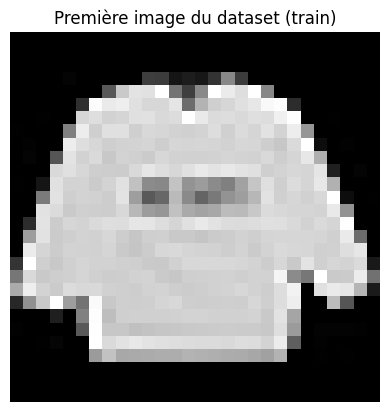

In [ ]:
# Chargement du CSV d'entraînement
observations_entrainement = pnd.read_csv('datas/fashion-mnist_train.csv')

print("Nb d'observations (train):", observations_entrainement.shape[0])
print("Nb de colonnes (label + pixels):", observations_entrainement.shape[1])

# On exclut la première colonne (labels) pour constituer un tableau de pixels
X = np.array(observations_entrainement.iloc[:, 1:])

# Affichage de la première image pour vérifier
premiereImage = X[0]
premiereImage = premiereImage.reshape([LONGUEUR_IMAGE, LARGEUR_IMAGE])

plt.imshow(premiereImage, cmap='gray')
plt.title("Première image du dataset (train)")
plt.axis('off')
plt.show()